# WeatherPy

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
#---- REQUESTS 10 SAMPLES FOR TESTING. CHANGE TO ALL CITIES FOR FINAL CODE ---

#Store the base url
url = 'https://api.openweathermap.org/data/2.5/weather'

#List to hold the response data
response_list = []

#Variable to store the number of cities processed successfully
cities_processed = 0
#Variable to store the number of cities skipped during processing
cities_skipped = 0

#Iterate through the list of cities
for city in cities[0:20]:
    
    #Attempt to retrieve city data
    try:
        #Build the query url
        query_url = f'{url}?q={city}&appid={weather_api_key}&units=imperial'
        
        #Print a message to show the city being processed
        print(f"Processing data for city {cities.index(city) + 1}: {city}.")
        
        #Make API request
        response = requests.get(query_url).json()

        #Create a dictionary of the desired data from the response
        response_dict = {'City': city.title(),
                         'Cloudiness': response['clouds']['all'],
                         'Country': response['sys']['country'],
                         'Date': response['dt'],
                         'Humidity': response['main']['humidity'],
                         'Lat': response['coord']['lat'],
                         'Lng': response['coord']['lon'],
                         'Max Temp': response['main']['temp_max'],
                         'Wind Speed': response['wind']['speed']
                        }
        #Add the response dictionary to the list of response data
        response_list.append(response_dict)
        
        #Add 1 to the cities_processed counter
        cities_processed += 1
        
    #If the city is not found
    except:
        #Print a message and skip processing for this city
        print(f"City {cities.index(city) + 1} not found. Skipping...")
        
        #Add 1 to the cities_skipped counter
        cities_skipped += 1
        
#Print a message when data retrieval is complete
print(f'''
-------------------------
Data processing complete.
Cities processed successfully: {cities_processed} 
Cities skipped: {cities_skipped}
-------------------------
''')

Processing data for city 1: busselton.
Processing data for city 2: amderma.
City 2 not found. Skipping...
Processing data for city 3: mahadday weyne.
City 3 not found. Skipping...
Processing data for city 4: solnechnyy.
Processing data for city 5: mayang imphal.
Processing data for city 6: yulara.
Processing data for city 7: syracuse.
Processing data for city 8: ushuaia.
Processing data for city 9: carnarvon.
Processing data for city 10: butaritari.
Processing data for city 11: oktyabrskoye.
Processing data for city 12: cockburn town.
Processing data for city 13: nanortalik.
Processing data for city 14: reyes.
Processing data for city 15: torbay.
Processing data for city 16: mys shmidta.
City 16 not found. Skipping...
Processing data for city 17: shahrud.
Processing data for city 18: mataura.
Processing data for city 19: monrovia.
Processing data for city 20: provideniya.

-------------------------
Data processing complete.
Cities processed successfully: 17 
Cities skipped: 3
---------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [57]:
#Create a data frame of the retrieved city data
response_df = pd.DataFrame(response_list)

#Export the city data to a .csv file
response_df.to_csv(output_data_file, index=False)

#Display the data frame
response_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,72,AU,1586729043,71,-33.65,115.33,62.01,9.28
1,Solnechnyy,0,RU,1586729188,74,50.72,136.63,34.16,1.03
2,Mayang Imphal,0,IN,1586729189,48,24.62,93.88,59.47,0.87
3,Yulara,0,AU,1586729189,45,-25.24,130.99,66.20,5.82
4,Syracuse,0,IT,1586728991,87,37.09,15.28,55.99,3.36
5,Ushuaia,75,AR,1586729190,86,-54.80,-68.30,41.00,23.04
6,Carnarvon,2,AU,1586729190,100,-24.87,113.63,75.20,16.11
7,Butaritari,98,KI,1586729191,81,3.07,172.79,83.01,16.02
8,Oktyabrskoye,96,RU,1586729191,66,43.06,44.74,33.69,4.18
9,Cockburn Town,0,TC,1586729092,80,21.46,-71.14,79.93,15.59


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

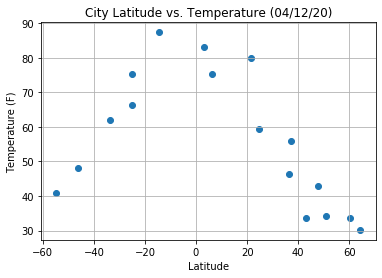

In [58]:
#Store the date of analysis
todays_date = date.today().strftime('%m/%d/%y')

#Create a scatter plot of latitude vs. temperature for cities in the response data frame
x_values = response_df['Lat']
y_values = response_df['Max Temp']
plt.scatter(x_values, y_values)

#Add plot titles/labels
plt.title(f"City Latitude vs. Temperature ({todays_date})")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()

#Export the scatter plot to a .png file
plt.savefig('output_data/images/lat_temp.png')

plt.show()

#### Latitude vs. Humidity Plot

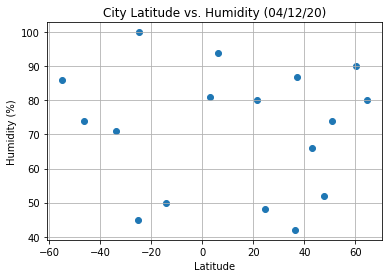

In [59]:
#Create a scatter plot of latitude vs. humidity for cities in the response data frame
x_values = response_df['Lat']
y_values = response_df['Humidity']
plt.scatter(x_values, y_values)

#Add plot titles/labels
plt.title(f"City Latitude vs. Humidity ({todays_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

#Export the scatter plot to a .png file
plt.savefig('output_data/images/lat_hum.png')

plt.show()

#### Latitude vs. Cloudiness Plot

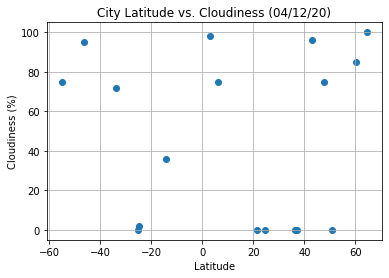

In [60]:
#Create a scatter plot of latitude vs. cloudiness for cities in the response data frame
x_values = response_df['Lat']
y_values = response_df['Cloudiness']
plt.scatter(x_values, y_values)

#Add plot titles/labels
plt.title(f"City Latitude vs. Cloudiness ({todays_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

#Export the scatter plot to a .png file
plt.savefig('output_data/images/lat_cloud.png')

plt.show()

#### Latitude vs. Wind Speed Plot

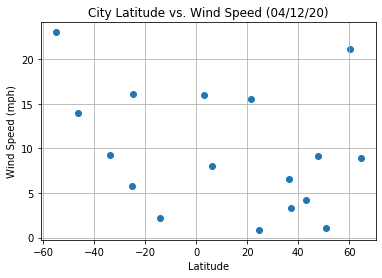

In [61]:
#Create a scatter plot of latitude vs. humidity for cities in the response data frame
x_values = response_df['Lat']
y_values = response_df['Wind Speed']
plt.scatter(x_values, y_values)

#Add plot titles/labels
plt.title(f"City Latitude vs. Wind Speed ({todays_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

#Export the scatter plot to a .png file
plt.savefig('output_data/images/lat_wind.png')

plt.show()

## Linear Regression

In [63]:
# Create Northern and Southern Hemisphere DataFrames

#Northern hemisphere data frame
north_df = response_df.loc[response_df['Lat'] >= 0]

#Southern hemisphere data frame
south_df = response_df.loc[response_df['Lat'] < 0]

In [79]:
#Store the latitude values for the northern hemisphere
north_lat = north_df['Lat']

#Store the latitude values for the southern hemisphere
south_lat = south_df['Lat']

#Function to create calculate linear regression model and plot the model over a scatter plot
def lin_regress(x_vals, y_vals, x_lab, y_lab, hemisphere, xy):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    regress_values = x_vals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_vals, y_vals)
    plt.plot(x_vals, regress_values,"r-")
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.xlabel(f"{x_lab}")
    plt.ylabel(f"{y_lab}")
    plt.title(f"""Linear Regression for City {x_lab} vs. {y_lab}
    in the {hemisphere} Hemisphere ({todays_date})""")
    plt.show()
    print(f"The r-squared is: {rvalue}")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

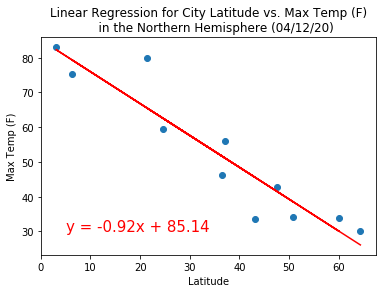

The r-squared is: -0.936165036187356


<Figure size 432x288 with 0 Axes>

In [80]:
#Create a scatter plot and linear regression model for latitude vs. max temperature in the northern hemisphere
#Function parameters: x-values, y-values, x-label, y-label, hemisphere (Northern/Southern), line equation display position
lin_regress(north_lat, north_df['Max Temp'], 'Latitude', 'Max Temp (F)', 'Northern', (5, 30))

#Export the plot as a .png
plt.savefig('output_data/images/north_lat_temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

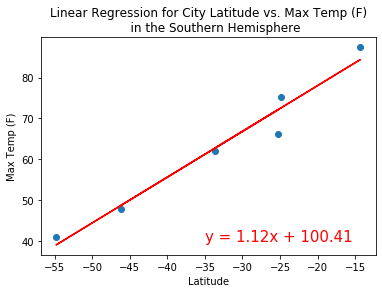

The r-squared is: 0.9806048484428644


In [64]:
#Create a scatter plot and linear regression model for latitude vs. max temperature in the southern hemisphere
lin_regress(south_lat, south_df['Max Temp'], 'Latitude', 'Max Temp (F)', 'Southern', (-35, 40))

#Export the plot as a .png
plt.savefig('output_data/images/south_lat_temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

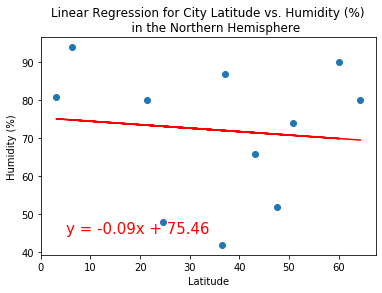

The r-squared is: -0.1038901816803044


In [66]:
#Create a scatter plot and linear regression model for latitude vs. humidity in the northern hemisphere
lin_regress(north_lat, north_df['Humidity'], 'Latitude', 'Humidity (%)', 'Northern', (5, 45))

#Export the plot as a .png
plt.savefig('output_data/images/north_lat_hum.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

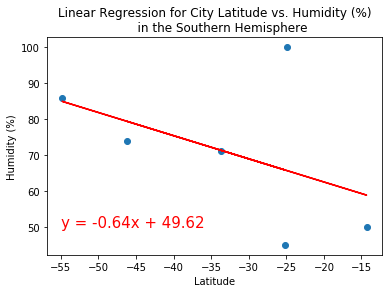

The r-squared is: -0.46163914181323457


<Figure size 432x288 with 0 Axes>

In [75]:
#Create a scatter plot and linear regression model for latitude vs. humidity in the southern hemisphere
lin_regress(south_lat, south_df['Humidity'], 'Latitude', 'Humidity (%)', 'Southern', (-55, 50))

#Export the plot as a .png
plt.savefig('output_data/images/south_lat_hum.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

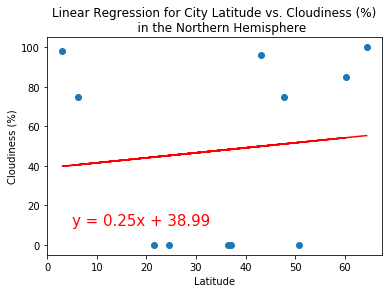

The r-squared is: 0.10984444519912948


In [69]:
#Create a scatter plot and linear regression model for latitude vs. cloudiness in the northern hemisphere
lin_regress(north_lat, north_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Northern', (5, 10))

#Export the plot as a .png
plt.savefig('output_data/images/north_lat_cloud.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

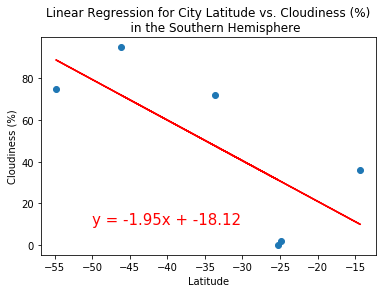

The r-squared is: -0.7290931539893118


In [70]:
#Create a scatter plot and linear regression model for latitude vs. cloudiness in the southern hemisphere
lin_regress(south_lat, south_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Southern', (-50, 10))

#Export the plot as a .png
plt.savefig('output_data/images/south_lat_cloud.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

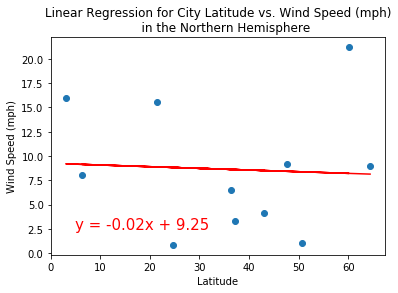

The r-squared is: -0.053088180747470445


In [71]:
#Create a scatter plot and linear regression model for latitude vs. wind speed in the northern hemisphere
lin_regress(north_lat, north_df['Wind Speed'], 'Latitude', 'Wind Speed (mph)', 'Northern', (5, 2.5))

#Export the plot as a .png
plt.savefig('output_data/images/north_lat_wind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

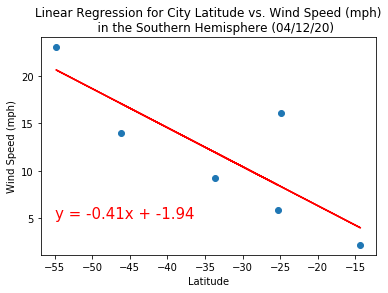

The r-squared is: -0.8196874493245154


<Figure size 432x288 with 0 Axes>

In [81]:
#Create a scatter plot and linear regression model for latitude vs. wind speed in the southern hemisphere
lin_regress(south_lat, south_df['Wind Speed'], 'Latitude', 'Wind Speed (mph)', 'Southern', (-55, 5))

#Export the plot as a .png
plt.savefig('output_data/images/south_lat_wind.png')